In [2]:
import numpy as np 
import matplotlib.pyplot as plt
import cv2
import seaborn as sn

# Transformation Matrices
Transformation matrices are operations that maps pixels $(x, y)$ to new location  $T\begin{bmatrix}x\\y\end{bmatrix}$


In [111]:
def plot_2D_transform(T, p, xlim=(-1, 2), ylim=(-1, 2)):
    plt.figure(figsize=(12, 4))
    ax1 = plt.subplot(131); ax1.set_aspect(1); 
    ax1.set_xlim(*xlim); ax1.set_ylim(*ylim); 
    ax1.fill(p[0], p[1])
    ax1.axhline(); ax1.axvline()
    ax2 = plt.subplot(132); ax2.set_aspect(1);
    ax2.set_axis_off();
    sn.heatmap(T, annot=True, ax=ax2, cbar=None, cmap="Greens")
    ax3 = plt.subplot(133); ax3.set_aspect(1);
    ax3.axhline(); ax3.axvline()
    ax3.set_xlim(*xlim); ax3.set_ylim(*ylim); 
    p_transformed = T @ p
    ax3.fill(p_transformed[0], p_transformed[1])
    return p_transformed

p = np.array([[0, 0, 1, 1],
              [0, 1, 1, 0]])

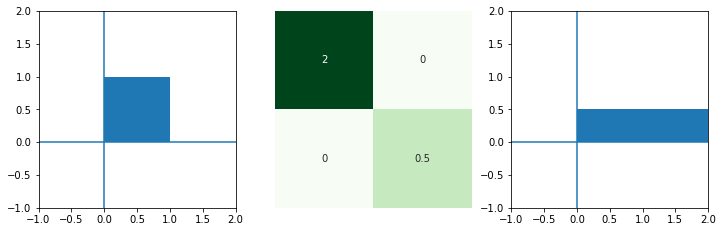

In [114]:
def scale_matrix(s_x, s_y):
    """ scale along x-axis by s_x and y-axis by s_y
    """
    return np.array(
        [[s_x, 0], 
         [0, s_y]]
    )
    return T
plot_2D_transform(scale_matrix(2,  0.5), p);

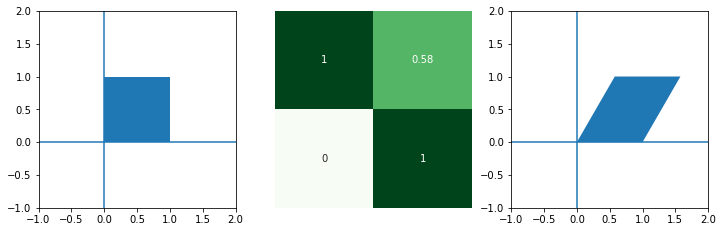

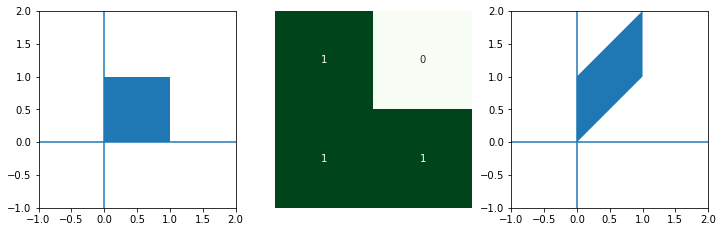

In [115]:
def shear_x(theta):
    """ Rotate along x-axis clockwise by an angle of theta
    """
    return np.array(
        [[1, np.tan(theta)], 
         [0, 1            ]]
    )

def shear_y(theta):
    """ Rotate along y-axis clockwise by an angle of theta
    """
    return np.array(
        [[1,             0], 
         [np.tan(theta), 1]]
    )

plot_2D_transform(shear_x(np.pi / 6), p)
plot_2D_transform(shear_y(np.pi / 4), p);

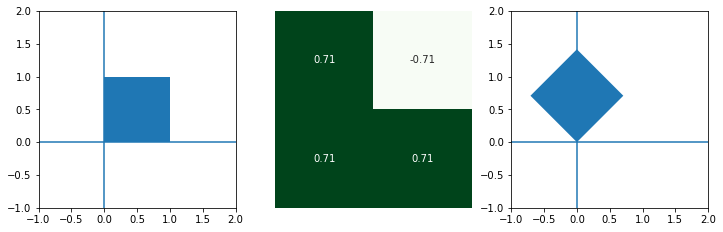

In [116]:
def rotate(theta):
    """ rotate along the origin by theta
    """
    return np.array([
        [np.cos(theta), -np.sin(theta)], 
        [np.sin(theta), np.cos(theta) ]
    ])
plot_2D_transform(rotate(np.pi / 4), p);

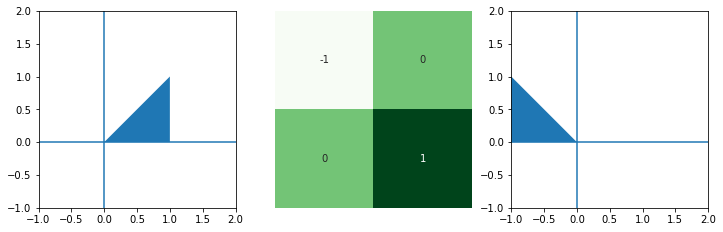

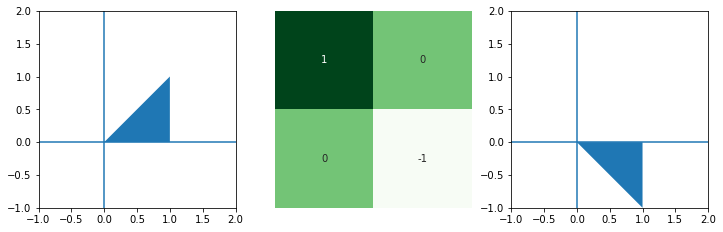

In [117]:
p = np.array([[0, 1, 1], 
              [0, 1, 0]])
def reflect_x():
    """ reflext along x-axis, special case of scale
    """
    return np.array(
        [[1,  0],
         [0, -1]]
    )
def reflect_y():
    """ reflext along x-axis, special case of scale
    """
    return np.array(
        [[-1,  0],
         [0, 1]]
    )
plot_2D_transform(reflect_y(), p)
plot_2D_transform(reflect_x(), p);

## Composition of Transformations
Note that transformations are matrices, hence linear, so we can compose multiple transformations matrices as one by multiplying these matrices, i.e. 
$$T_1T_2..T_np = (T_1T_2...T_n)p$$

## Decomposition of Transformations
Just we can compose transformations together, we can decompose a transformation into several transformations

### Eigenvalue Decomposition
By spectrum theorem, a symmetric matrix can be decomposed as 
$$A = RSR^T$$
Note that $R$'s columns are eigen vectors, $S$ is the diagonal matrix of eigenvalues

Therefore, geometrically, $R^T$ is a rotate matrix to have $v_1, v_2$ rotate to $e_1, e_2$, then scale by $S$, and $R$ rotate $e_1, e_2$ back to $v_1, v_2$

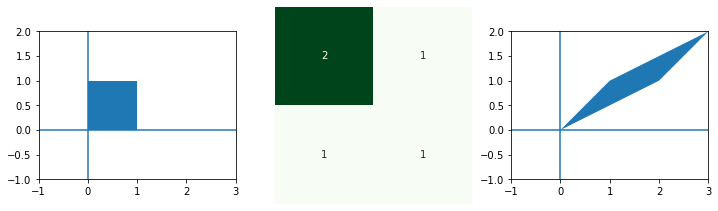

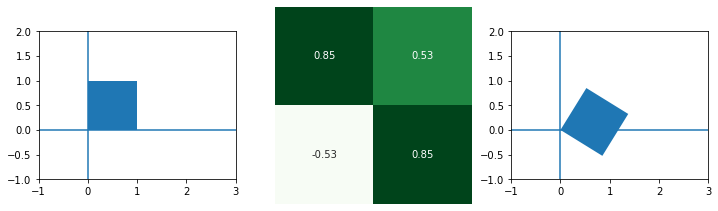

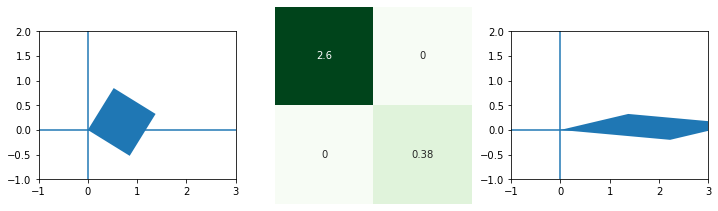

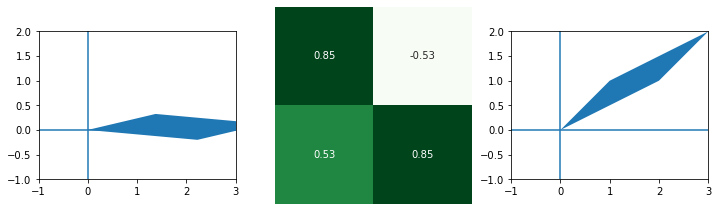

In [122]:
T = np.array([[2, 1], [1, 1]])
p = np.array([[0, 0, 1, 1],
              [0, 1, 1, 0]])
plot_2D_transform(T, p, xlim=(-1, 3))

S, R = np.linalg.eig(T)
S = np.diag(S)
p1 = plot_2D_transform(R.T, p, xlim=(-1, 3))
p2 = plot_2D_transform(S, p1, xlim=(-1, 3))
p3 = plot_2D_transform(R, p2, xlim=(-1, 3))

### Singular Value Decomposition
Similar to eigendocomposition, while works with nonsymmetric matrices
$$A = USV^T$$
where $V^T$ rotate $v_1, v_2$ to $e_1, e_2$, $S$ scales it by singular values, and $U$ rotate $e_1, e_2$ to $u_1, u_2$

### Peath Decomposition of Rotations
$$rotate(\theta) = shear\_x(\frac{\cos\theta - 1}{\sin\theta})shear_y(\sin\theta)shear\_x(\frac{\cos\theta - 1}{\sin\theta})$$

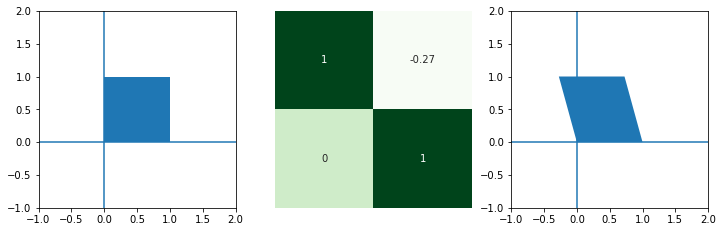

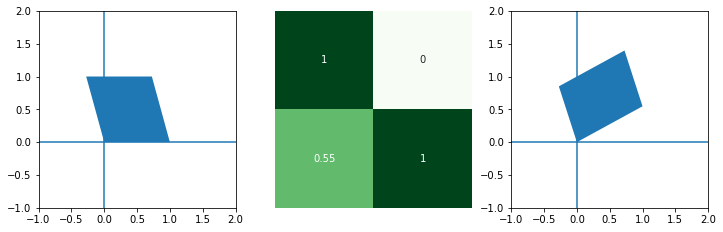

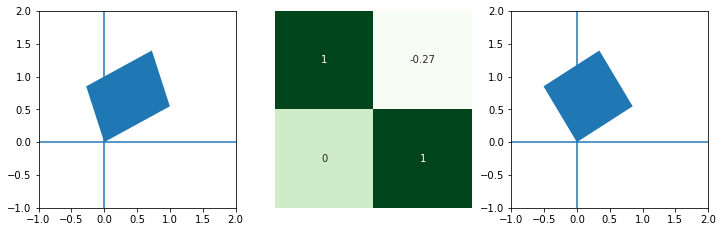

In [131]:
# rotate 45 degrees
theta = np.float64(np.pi/6)
p1 = plot_2D_transform(shear_x((np.cos(theta) - 1) / np.sin(theta)), p)
p2 = plot_2D_transform(shear_y(np.sin(theta)), p1)
p1 = plot_2D_transform(shear_x((np.cos(theta) - 1) / np.sin(theta)), p2)

## 3D Linear Transformations
Similar to 2D, some common matrices are
$$\text{scale}(s_x, s_y, s_z) = diag(s_x, s_y, s_z)$$
$$\text{rotate_z}(\phi) = \begin{bmatrix}\cos\theta&-\sin\theta&0\\
\sin\theta&\cos\theta&0\\
0&0&1\end{bmatrix}$$
$$\text{rotate_y}(\phi) = \begin{bmatrix}\cos\theta&-\sin\theta&0\\
0&1&1\\
\sin\theta&\cos\theta&0\end{bmatrix}$$
$$\text{rotate_z}(\phi) = \begin{bmatrix}1&0&0\\
\cos\theta&-\sin\theta&0\\
\sin\theta&\cos\theta&0\end{bmatrix}$$

To rotate along an arbitrary axis, let $u, v, w$ be an orthogonal basis where the rotation axis is within. Then let 
$$R_{3\times 3} = \begin{bmatrix}u&v&w\end{bmatrix}$$
then, note that $R^T$ transforms $u, v, w$ to $x, y, z$ so that we can have 
$$R\:\text{rotate_x}(\theta)\:R^T$$
which will rotate along $u$ axis by $\theta$.

## 3D Affine Transformations
See <a href="../CSC420 Intro to Image Understanding/NOTE/Homography - Basics and Camera Model.html">CSC420 Notes on transformations and camera</a>

# Viewing Transformations
![](./assets/view_transformation.png)
The viewing transformations inputs a canonical coordinate $(x, y, z)$ to some $(x, y)$ on the 2D image space. One common system is a sequence of 3 transformations
 - __camera transformation__ $(x, y, z)\rightarrow (x_c, y_c, z_c)$ given $eye$ and orientation $u, v, w$
 - __projection transformation__ $(x_c, y_c, z_c) \rightarrow (x_v, y_v)$, $x_v, y_v\in [-1, 1]$ all the points that  are visible in the camera space given the type of projection desired
 - __viewport transformation__ $(x_v, y_v)\rightarrow (I_x, I_y)$ maps the unit image rectangle to desired rectangle in pixel coordinates

## <a href="http://www.songho.ca/opengl/gl_projectionmatrix.html">Perspective Projection</a>

# <a href="https://www.khronos.org/opengl/wiki/Rendering_Pipeline_Overview">Shader Pipeline (OpenGL documentation)</a>


__Vertex specification__  
Set up Vertex Array Object (VAO), which contains one or more Vertex BUffer Objects (VBO), each VBO stores some information about each vertex. For example, if we load a .obj file, then VAO (the object) may end up having several VBOs, for example, one VBO stores vertex positions, one VBO stores vertex colors, and another one stores vertex normals.

__Vertex shader__  
Performs operation on every vertex, doing all the homogeneous transformations, i.e.
 - $M$: modeling transformation: to move object into world space, doing all the translations, rotations, scaling, etc. 
 - $V$ viewing transformation/camera transformation: transforms from world coordinates to camera coordinates. 
 - $P$ perspective projection matrix, so that we only consider vertex in the window space (visible within the camera), and normalize $(x, y, z)$ by $w$.


__Tessellation__  
patches of vertex data are subdivided into smaller Primitives. Tessellation control shader (TCS) determines how much tessellation to do and 
tessellation evaluation shader (TES) takes the tessellated patch and computes vertex values for each generated vertex.  
For example catmull–clark subdivision can be a TCS/TES algorithm

__Rasterization__  
Given the tessellated primitives, filled in the primitive with pixels. 

__Fragment shader__  
Given a sample-sized segment of a rasterized Primitive, fragment shader computes a set of colors and a single depth value. In our cases, it will be pixel-wise coloring.

# Value Noise and Procedural Patterns
Other than a texture mapping, we can also generate patterns, i.e. procedural patterns. For example, if we want to make a ocean texture, we can generate some waves mesh and color it by some algorithm, instead of map a 2D image onto it. 

## Noise
Note that in reality, lots of patterns need some sort of "randomness", s.t. the volume of a cloud on the sky, the waves of the water, etc. 

### Properties of Ideal Noise
 - __pseudo random__ Given the same input, it should always return the same value. 
 - __dimension__ The noise function is some $N:\mathbb R^d\rightarrow \mathbb R$, which is a $d$-dim noise function. 
 - __band limited__ One of the frequencies dominates all others. 
 - __continuity / differentiability__ We want the change in local is small, but change in global is large

## <a href="https://en.wikipedia.org/wiki/Perlin_noise#Algorithm_detail">Perlin Noise</a>
Perlin noise is a example of value noise, it's pseudo random, and continuous, and good in producing marble like surfaces. 

### Algorithm
__Grid Definition__  
Define an n-dim grid where each point has a random n-dim unit-length gradient vector. 

__Dot product__  
Assume $3D$ case and each box grid has side length 1. For query position $(x, y, z)$, it is located in some $d$-dim grid formed by $2^3$ grid points, $(\lfloor x\rfloor, \lceil x\rceil)\times (\lfloor y\rfloor, \lceil y\rceil)\times (\lfloor z\rfloor, \lceil z\rceil)$. Generate $2^d$ __dotGridGradient__ by dot product the offset to each grid point and gradient at that grid point. 

__Interpolation__  
Note that we have $2^3$ scale values, and we will have a trilinear interpolation so that we can get the value at that point.  
Note that we take a smooth step $s:\mathbb R^d\rightarrow \mathbb R^d$ as the coefficient of interpolation. $s$ must have the property $s(0) = s(1) = s'(0) = s'(1) = 0$, one good smooth step function is 
$$s(t) = 3t^2 - 2t^3$$

## Improved Perlin Noise
Note that $s''(t) = 6 - 12t$ is not continuous,  if the derivative of the function used to compute the normal of the displaced mesh is not continuous then it will introduce a discontinuity in these normals wherever $x=0, 1$, so that we use improved smooth step
$$6t^5 - 15t^4 + 10t^3$$
Also, note that when random directions (gradient direction) is close to standard direction $e_i$, the noise function have very high values $\sim1$ causing a "splotchy appearance", so instead of using random directions, we use directions randomly chosen from $(1,1,0),(−1,1,0),(1,−1,0),(−1,−1,0),(1,0,1),(−1,0,1),(1,0,−1),(−1,0,−1),(0,1,1),(0,−1,1),(0,1,−1),(0,−1,−1)$

In [74]:
""" Example of generating 3-D perlin noise
"""
def random_direction(seed, size):
    """ generate a size*size*size grid of random directions
        given a seed. 
        The directions are uniformly distributes within
        unit length
    """
    np.random.seed(seed)
    phis = np.random.uniform(0, np.pi*2, (size, size, size))
    costhetas = np.random.uniform(-1, 1, (size, size, size))
    thetas = np.arccos(costhetas)
    directions = np.empty((size, size, size, 3))
    directions[:, :, :, 0] = np.sin(thetas) * np.cos(phis)
    directions[:, :, :, 1] = np.sin(thetas) * np.sin(phis)
    directions[:, :, :, 2] = np.cos(thetas)
    directions /= np.linalg.norm(directions, axis=3)[:, :, :, None]
    return directions

def smooth_step(x):
    return 3 * x**2 - 2 * x ** 3
def perlin_noise(query_points, seed, size):
    """ Given a N*3 query_points, 
        generate Perlin noise from size*size*size random directions grid
        return N values of the Perlin noise at those points
    """
    # Generate grid and assign random directions
    grid = random_direction(seed, size)

    query_points = (size - 2) * (query_points - query_points.min(axis=0)) / query_points.max(axis=0) + 1

    # calculate the offset
    q_grid = np.array([
        np.floor(query_points).astype(int),
        np.ceil(query_points).astype(int)
    ])

    dotGrad = np.empty((2, 2, 2, query_points.shape[0]))
    for i in range(2):
        for j in range(2):
            for k in range(2):
                offset = np.array([
                    query_points[:, 0] - q_grid[i, :, 0], 
                    query_points[:, 0] - q_grid[j, :, 1],
                    query_points[:, 0] - q_grid[k, :, 2]
                ]).swapaxes(0, 1)
                grad = grid[q_grid[i, :, 0], q_grid[j, :, 0], q_grid[k, :, 0]]
                dotGrad[i, j, k] = offset[:, 0] * grad[:, 0] +\
                                   offset[:, 1] * grad[:, 1] +\
                                   offset[:, 2] * grad[:, 2]
    # interpolation
    smooth_coef = smooth_step(query_points - q_grid[0])
    t00 = dotGrad[0, 0, 0] * smooth_coef[:, 0] + dotGrad[1, 0, 0] * (1 - smooth_coef[:, 0])
    t01 = dotGrad[0, 0, 1] * smooth_coef[:, 0] + dotGrad[1, 0, 1] * (1 - smooth_coef[:, 0])
    t10 = dotGrad[0, 1, 0] * smooth_coef[:, 0] + dotGrad[1, 1, 0] * (1 - smooth_coef[:, 0])
    t11 = dotGrad[0, 1, 1] * smooth_coef[:, 0] + dotGrad[1, 1, 1] * (1 - smooth_coef[:, 0])
    b0 = t00 * smooth_coef[:, 1] + t10 * (1 - smooth_coef[:, 1])
    b1 = t01 * smooth_coef[:, 1] + t11 * (1 - smooth_coef[:, 1])
    noise = b0 * smooth_coef[:, 2] + b1 * (1 - smooth_coef[:, 2])
    return np.clip(noise, -1, 1)

# Bump Mapping and Normal Mapping
The real surface is often rough and bumpy, we use bump mapping algorithm to achieve the same effect. 
$$\tilde p(p):\mathbb R^3\rightarrow\mathbb R^3 := p + h(p)\hat n (p)$$
where $p$ is the original position, $\hat n$ is the normal and $h$ is the bump height function. 

Then, note that we have to calculate a new normal for the bumped point as 
$$\tilde n(p) = \partial_Tp\times \partial_Bp \approx \frac{\tilde p(p +\epsilon T)-\tilde p(p)}{\epsilon} \times \frac{\tilde p(p +\epsilon B)-\tilde p(p)}{\epsilon}$$
where $T, B$ are the tangent and bitangent vector where 
$$T = \min\{\hat n \times (0, 1, 0),  \hat n \times (0, 0, 1)\}, B = T\times N$$
Note that bump mapping does not actually change the vertex position, it is used to obtain the normal mapping so that we can apply the coloring and make the surface looks "bumpy"